# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [747]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [749]:
# Importing the file porter_data_1.csv
df = pd.read_csv(r"C:\Masters-Course\Delivery_Starter\porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [751]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

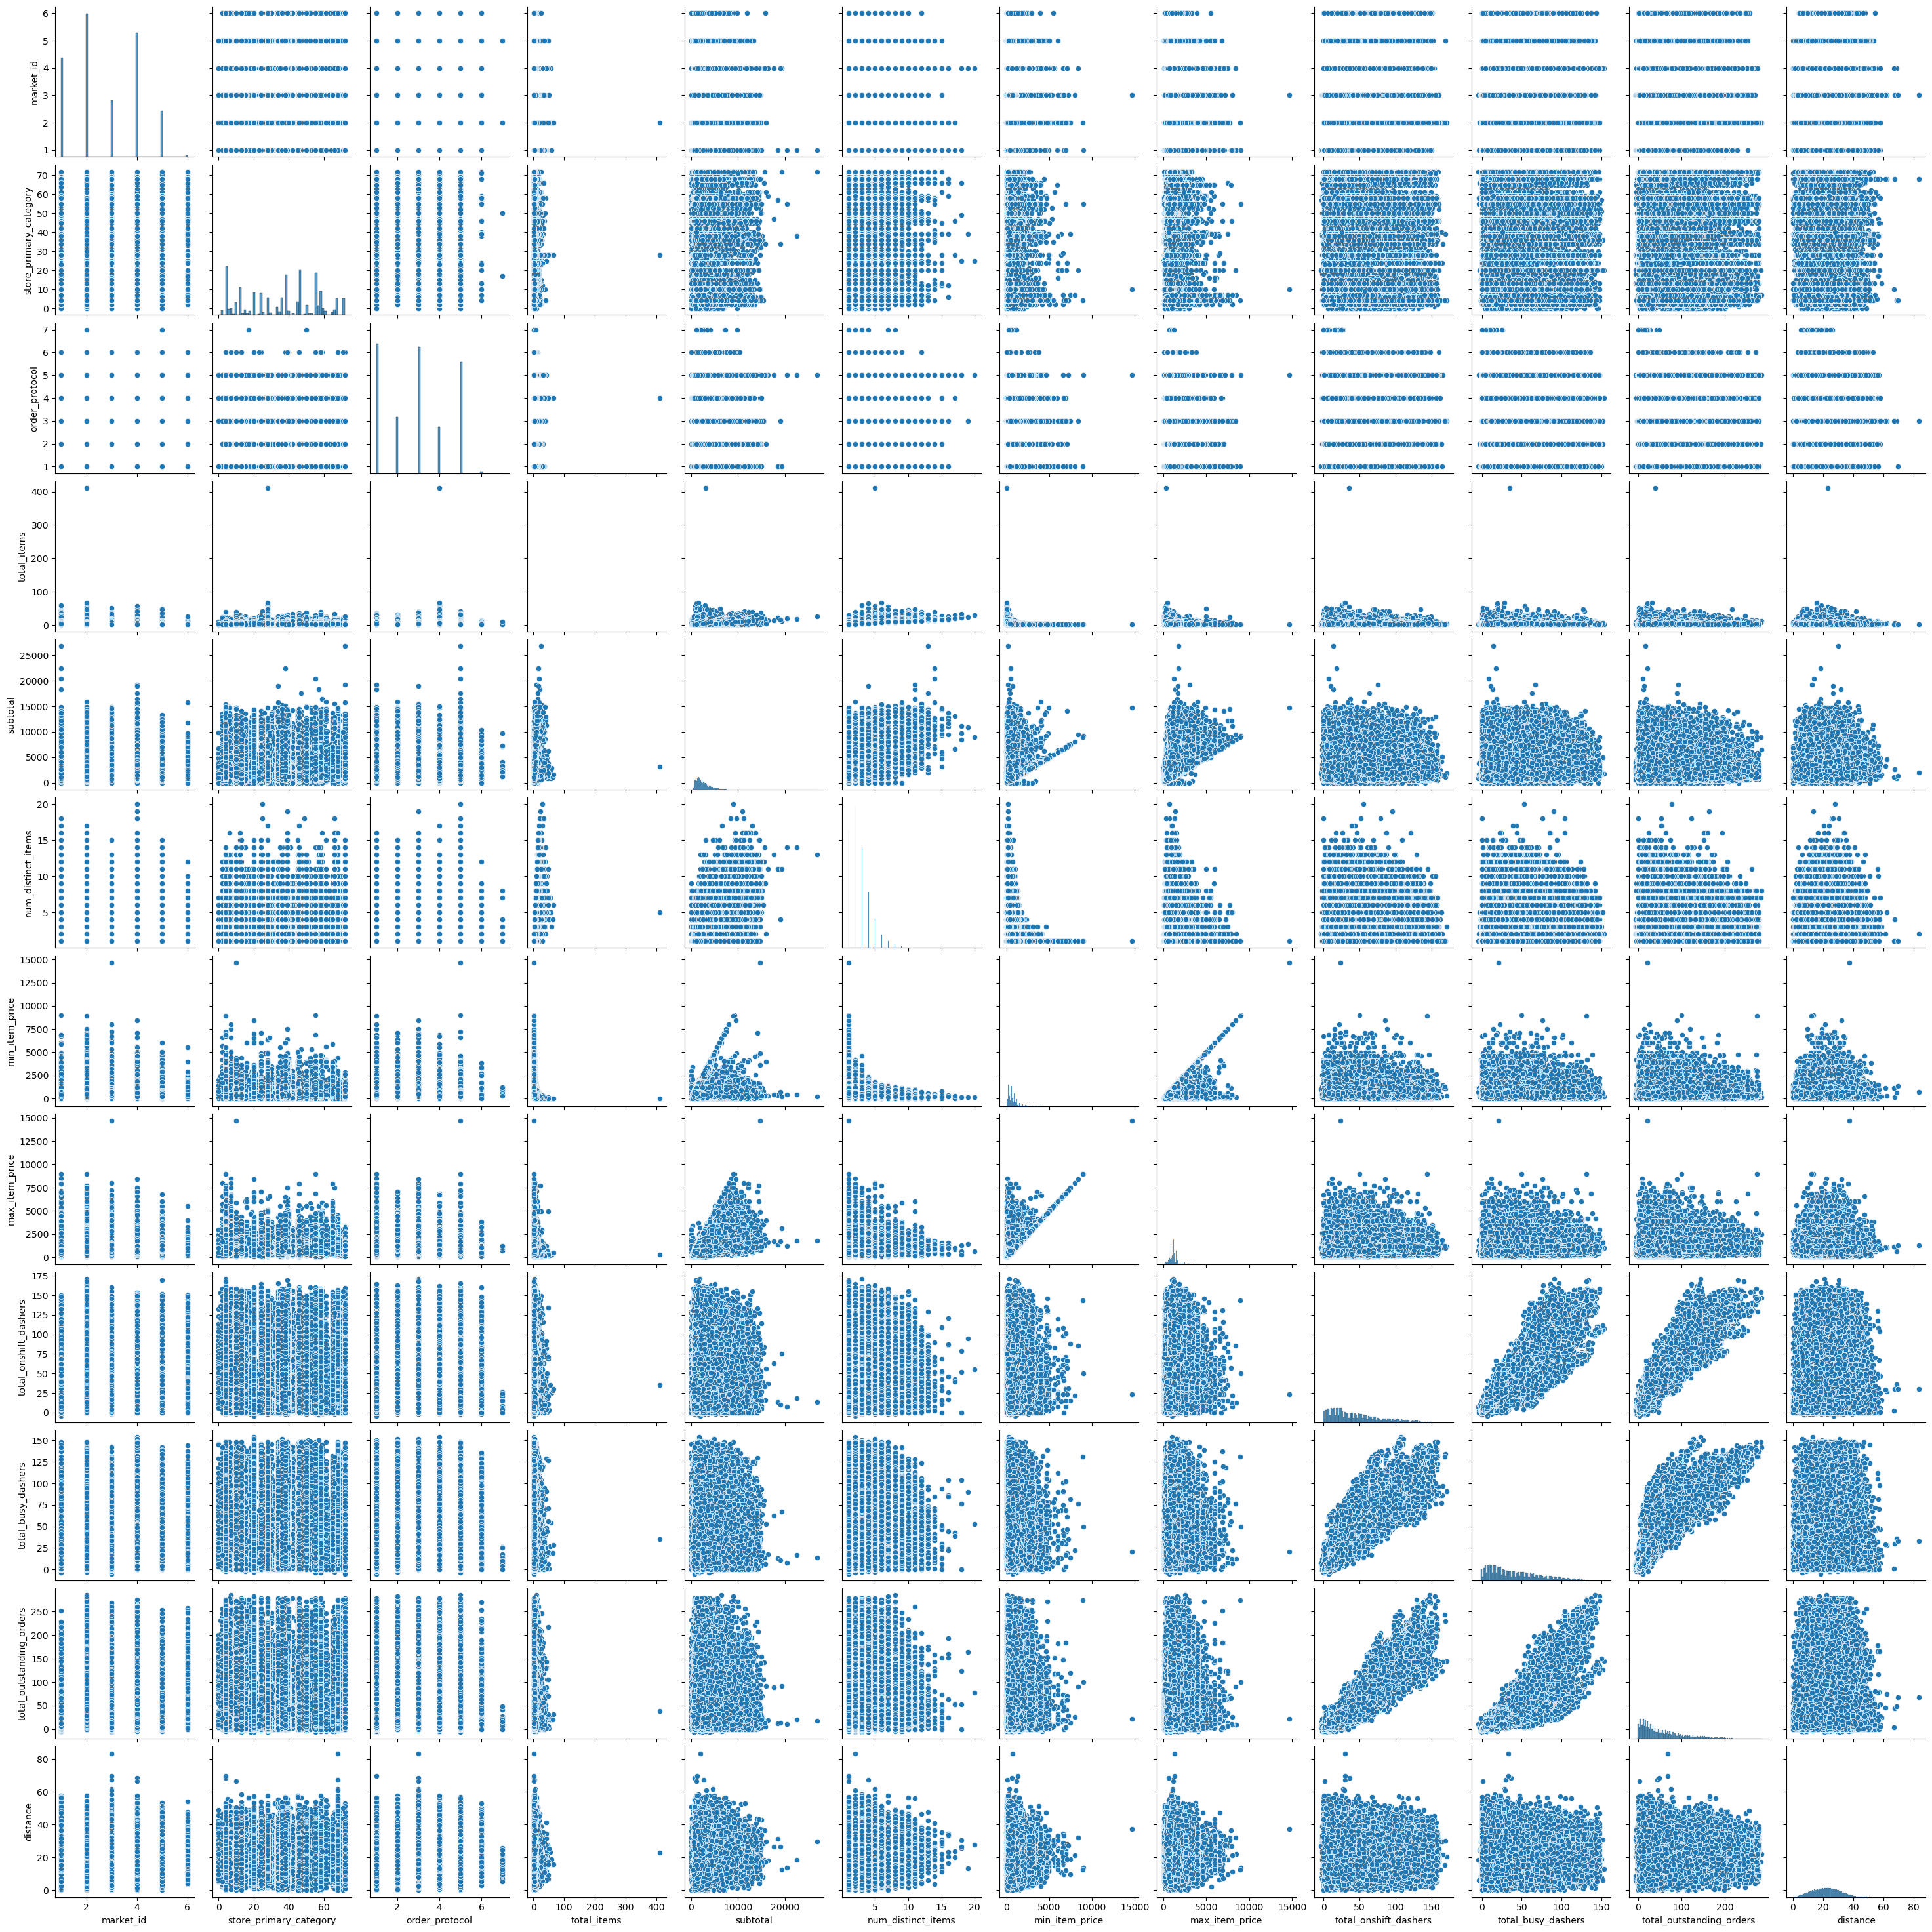

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [753]:
# Convert categorical features to category type
df_encoded = pd.get_dummies(df, columns=['store_primary_category', 'order_protocol', 'market_id'], drop_first=True)

In [755]:
varlist = ['store_primary_category_1',      
'store_primary_category_2',        
'store_primary_category_3',        
'store_primary_category_4',        
'store_primary_category_5',        
'store_primary_category_6',        
'store_primary_category_7',        
'store_primary_category_8',        
'store_primary_category_9',        
'store_primary_category_10',        
'store_primary_category_11',        
'store_primary_category_12',        
'store_primary_category_13',        
'store_primary_category_14',        
'store_primary_category_15',        
'store_primary_category_16',        
'store_primary_category_17',        
'store_primary_category_18',        
'store_primary_category_19',        
'store_primary_category_20',        
'store_primary_category_21',        
'store_primary_category_22',        
'store_primary_category_23',        
'store_primary_category_24',        
'store_primary_category_25',        
'store_primary_category_26',        
'store_primary_category_27',        
'store_primary_category_28',        
'store_primary_category_29',        
'store_primary_category_30',        
'store_primary_category_31',        
'store_primary_category_32',        
'store_primary_category_33',        
'store_primary_category_34',        
'store_primary_category_35',        
'store_primary_category_36',        
'store_primary_category_37',        
'store_primary_category_38',        
'store_primary_category_39',        
'store_primary_category_40',        
'store_primary_category_41',        
'store_primary_category_42',        
'store_primary_category_43',        
'store_primary_category_44',        
'store_primary_category_45',        
'store_primary_category_46',        
'store_primary_category_47',        
'store_primary_category_48',        
'store_primary_category_49',        
'store_primary_category_50',        
'store_primary_category_51',        
'store_primary_category_52',        
'store_primary_category_53',        
'store_primary_category_54',        
'store_primary_category_55',        
'store_primary_category_56',        
'store_primary_category_57',        
'store_primary_category_58',        
'store_primary_category_59',        
'store_primary_category_60',        
'store_primary_category_61',        
'store_primary_category_62',        
'store_primary_category_63',        
'store_primary_category_64',        
'store_primary_category_65',        
'store_primary_category_66',        
'store_primary_category_67',        
'store_primary_category_68',        
'store_primary_category_69',        
'store_primary_category_70',        
'store_primary_category_71',        
'store_primary_category_72',        
'order_protocol_2.0',        
'order_protocol_3.0',        
'order_protocol_4.0',       
'order_protocol_5.0',        
'order_protocol_6.0',        
'order_protocol_7.0',        
'market_id_2.0',        
'market_id_3.0',        
'market_id_4.0',        
'market_id_5.0',        
'market_id_6.0']

def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
df_encoded[varlist] = df_encoded[varlist].apply(binary_map)

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [757]:
# Calculate time taken in minutes
df_encoded['delivery_time_minutes'] = (df_encoded['actual_delivery_time'] - df_encoded['created_at']).dt.total_seconds() / 60
df_encoded.head()

created_at actual_delivery_time  total_items  subtotal  \
0 2015-02-06 22:24:17  2015-02-06 23:11:17            4      3441   
1 2015-02-10 21:49:25  2015-02-10 22:33:25            1      1900   
2 2015-02-16 00:11:35  2015-02-16 01:06:35            4      4771   
3 2015-02-12 03:36:46  2015-02-12 04:35:46            1      1525   
4 2015-01-27 02:12:36  2015-01-27 02:58:36            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  ...  order_protocol_4.0  \
0                14.0                      21.0  ...                   0   
1                 2.0                       2.0  ...                   0   
2                 6.0                      18.0  ...                   0   
3                 6.0                       8.0  ...                   0   
4                 5.0                       7.0  ...                   0   

   order_protocol_5.0  order_protocol_6.0  order_protocol_7.0  market_id_2.0  \
0                   0                   0                   0              0   
1                   0                   0                   0              1   
2                   0                   0                   0              1   
3                   0                   0                   0              0   
4                   0                   0                   0              0   

   market_id_3.0  market_id_4.0  market_id_5.0  market_id_6.0  \
0              0              0              0              0   
1              0              0              0              0   
2              0              0              0              0   
3              0              0              0              0   
4              0              0              0              0   

   delivery_time_minutes  
0                   47.0  
1                   44.0  
2                   55.0  
3                   59.0  
4                   46.0  

[5 rows x 95 columns]

In [759]:
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  
0                      21.0     34.44                   47.0  
1                       2.0     27.60                   44.0  
2                      18.0     11.56                   55.0  
3                       8.0     31.80                   59.0  
4                       7.0      8.20                   46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [761]:
# Extract the hour and day of week from the 'created_at' timestamp
df_encoded['created_hour'] = df_encoded['created_at'].dt.hour
df_encoded['created_dayofweek'] = df_encoded['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'

df_encoded['isWeekend'] = df_encoded['created_dayofweek'].isin([5, 6]).astype(int)

In [763]:
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['created_dayofweek'].isin([5, 6]).astype(int)

In [765]:
# Drop unnecessary columns
df_encoded.drop(['created_at','actual_delivery_time'], axis = 1, inplace = True)
df.drop(['created_at','actual_delivery_time'], axis = 1, inplace = True)

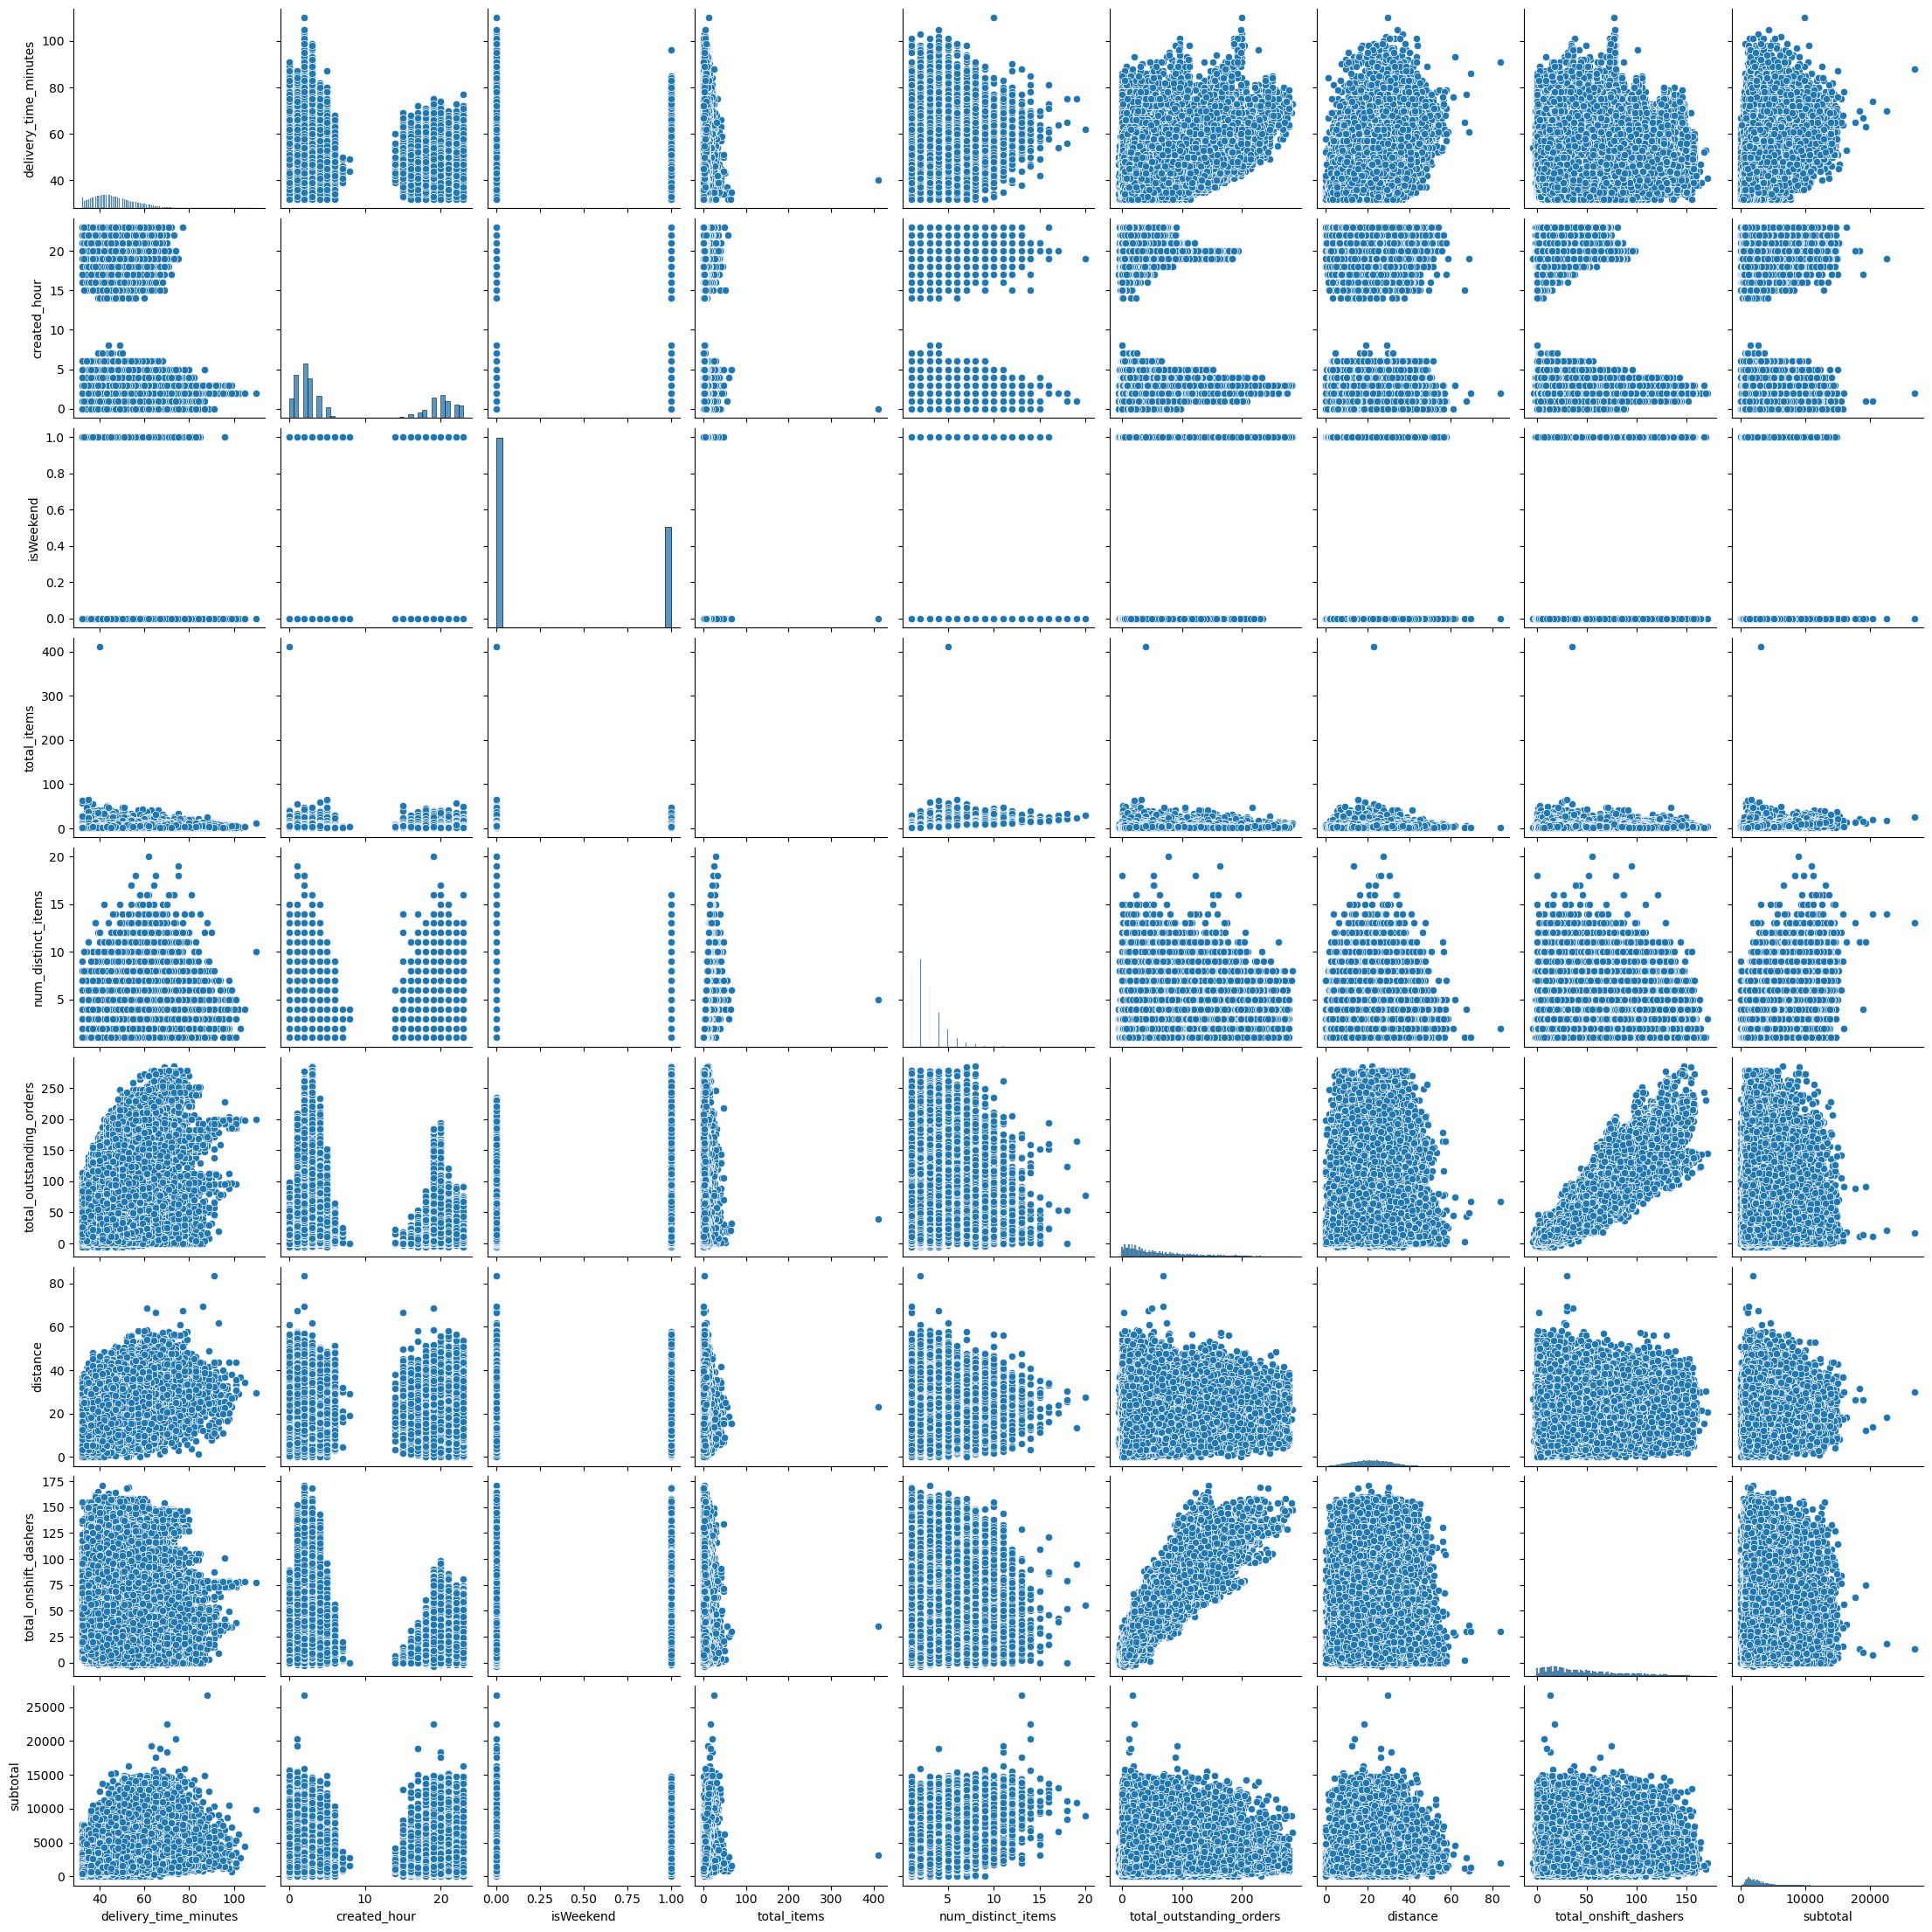

In [249]:
#analyzing the features
import matplotlib.pyplot as plt
import seaborn as sns
varlist = ['delivery_time_minutes','created_hour','isWeekend','total_items','num_distinct_items','total_outstanding_orders','distance','total_onshift_dashers','subtotal']
sns.pairplot(df_encoded[varlist])
plt.show()

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [767]:
# Define target variable (y) and features (X)
y = df_encoded['delivery_time_minutes']
X = df_encoded[['created_hour','created_dayofweek','isWeekend','total_items','num_distinct_items','total_outstanding_orders','total_busy_dashers','distance','total_onshift_dashers','subtotal','min_item_price','max_item_price']]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [880]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_encoded, train_size = 0.7, test_size = 0.3, random_state = 42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [731]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_df = df[['delivery_time_minutes','total_items','num_distinct_items','total_outstanding_orders','total_busy_dashers','distance','total_onshift_dashers','subtotal','min_item_price','max_item_price']]
categorical_df = df[['market_id','store_primary_category','order_protocol','created_hour','created_dayofweek','isWeekend']]

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

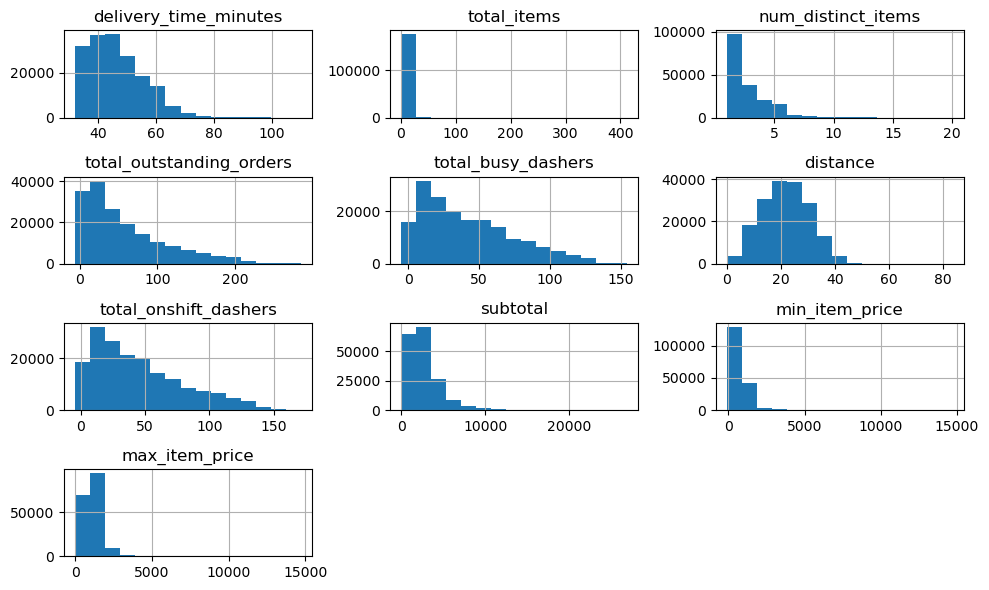

In [259]:
# Plot distributions for all numerical columns

numerical_df = df[['delivery_time_minutes','total_items','num_distinct_items','total_outstanding_orders','total_busy_dashers','distance','total_onshift_dashers','subtotal','min_item_price','max_item_price']]

# Plot histograms for all numerical columns
numerical_df.hist(bins=15, figsize=(10, 6))
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

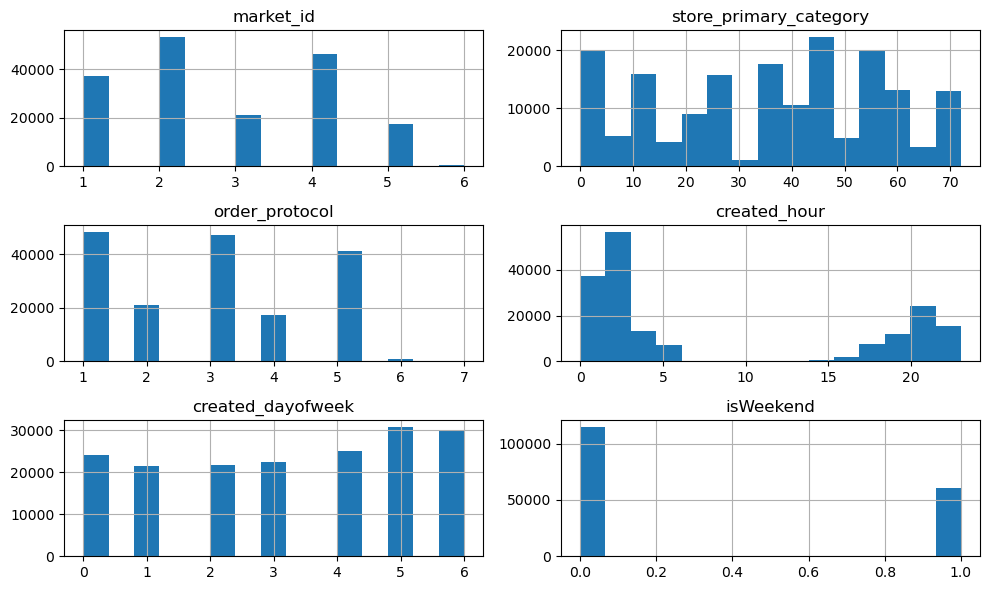

In [261]:
# Distribution of categorical columns

categorical_df = df[['market_id','store_primary_category','order_protocol','created_hour','created_dayofweek','isWeekend']]

# Plot histograms for all numerical columns
categorical_df.hist(bins=15, figsize=(10, 6))
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

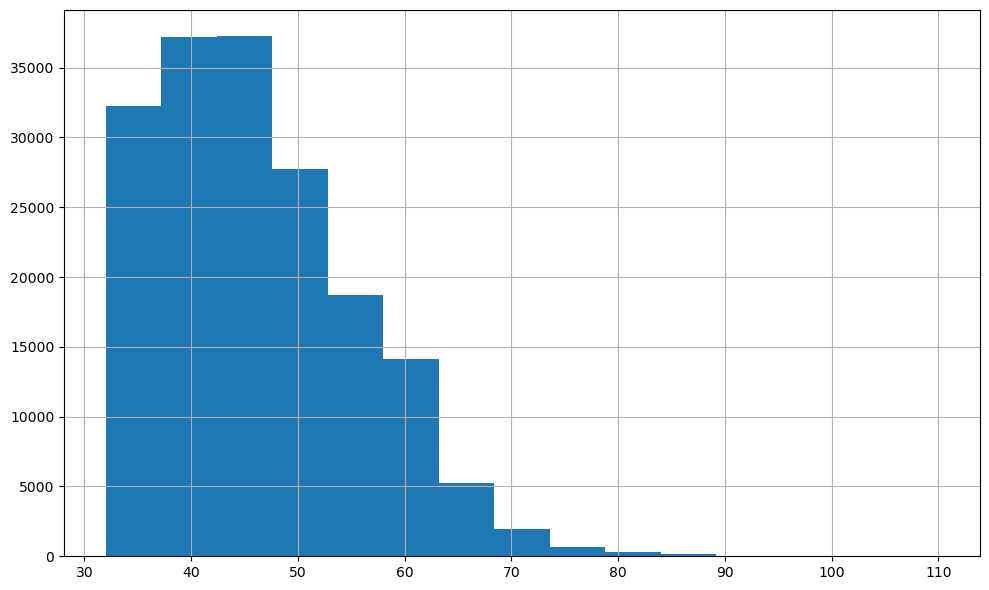

In [263]:
# Distribution of time_taken

df['delivery_time_minutes'].hist(bins=15, figsize=(10, 6))
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

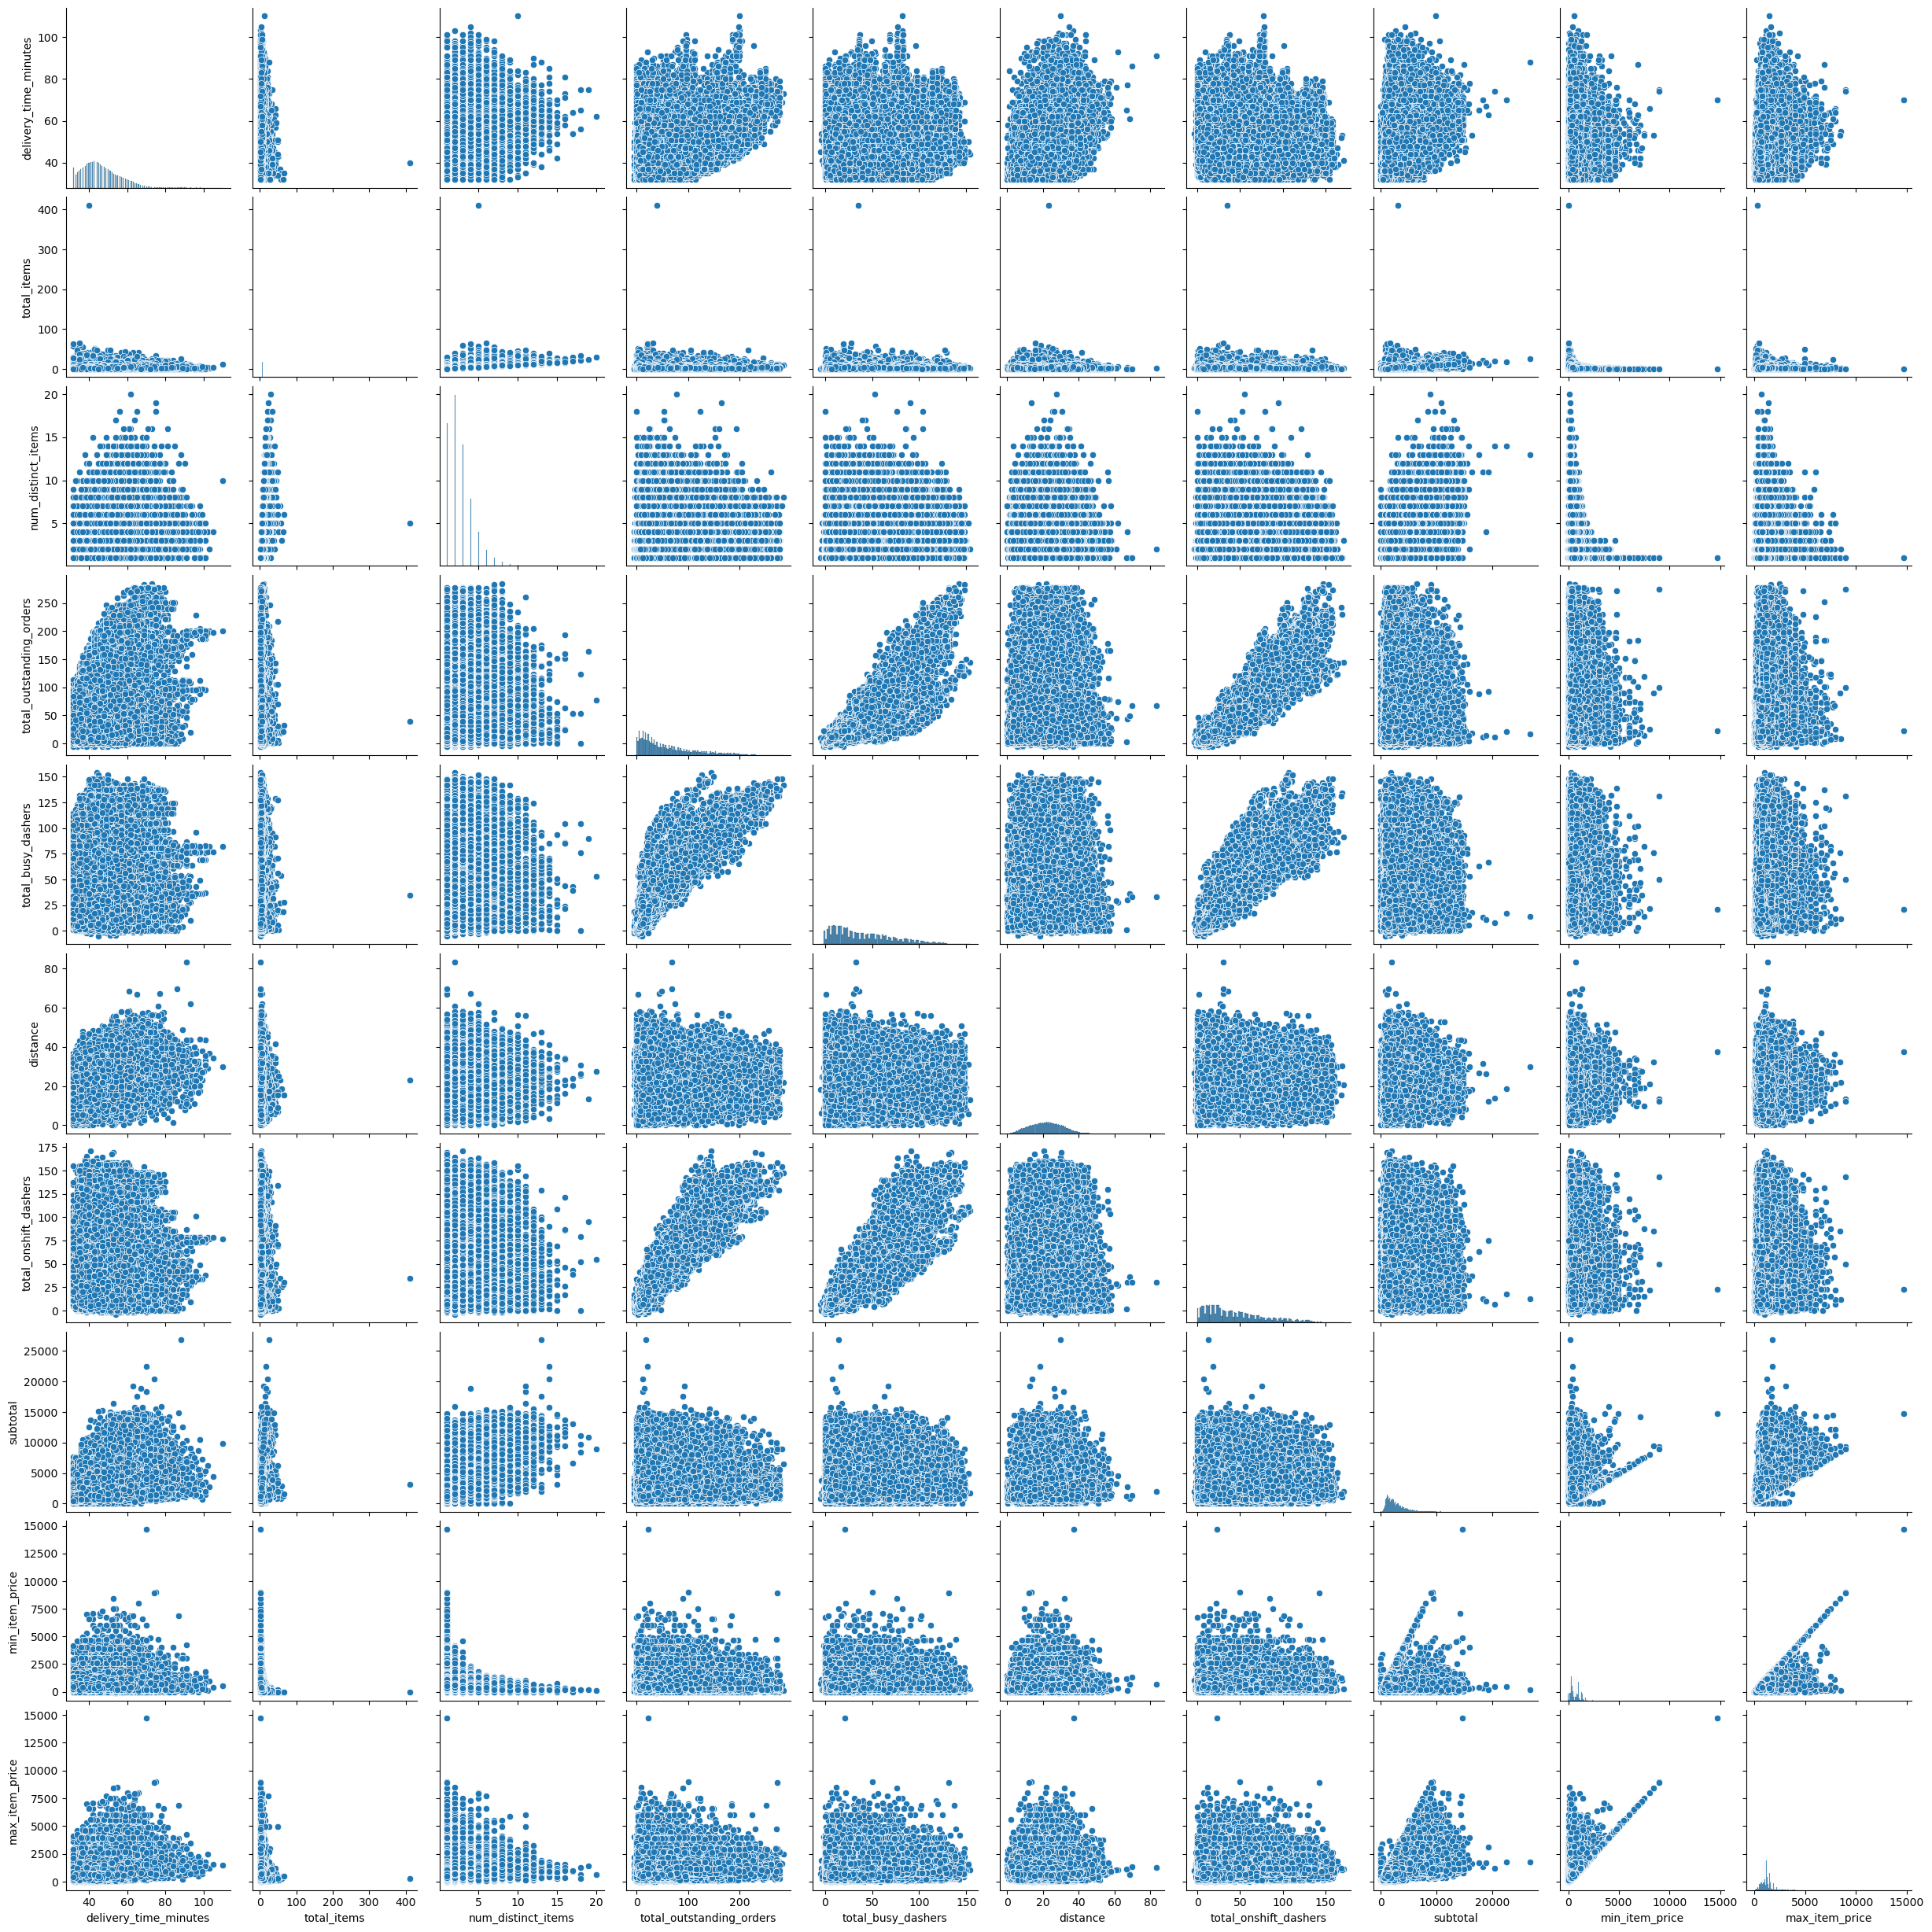

In [265]:
# Scatter plot to visualise the relationship between time_taken and other features
numerical_col = ['delivery_time_minutes','total_items','num_distinct_items','total_outstanding_orders','total_busy_dashers','distance','total_onshift_dashers','subtotal','min_item_price','max_item_price']
sns.pairplot(df[numerical_col])


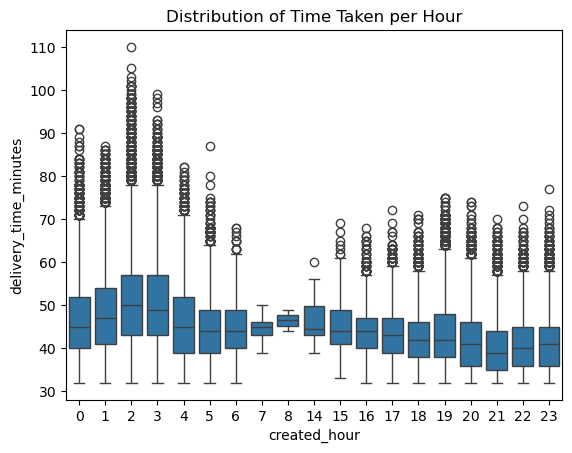

In [267]:
# Show the distribution of time_taken for different hours

sns.boxplot(data=df, x='created_hour', y='delivery_time_minutes')
plt.title('Distribution of Time Taken per Hour')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

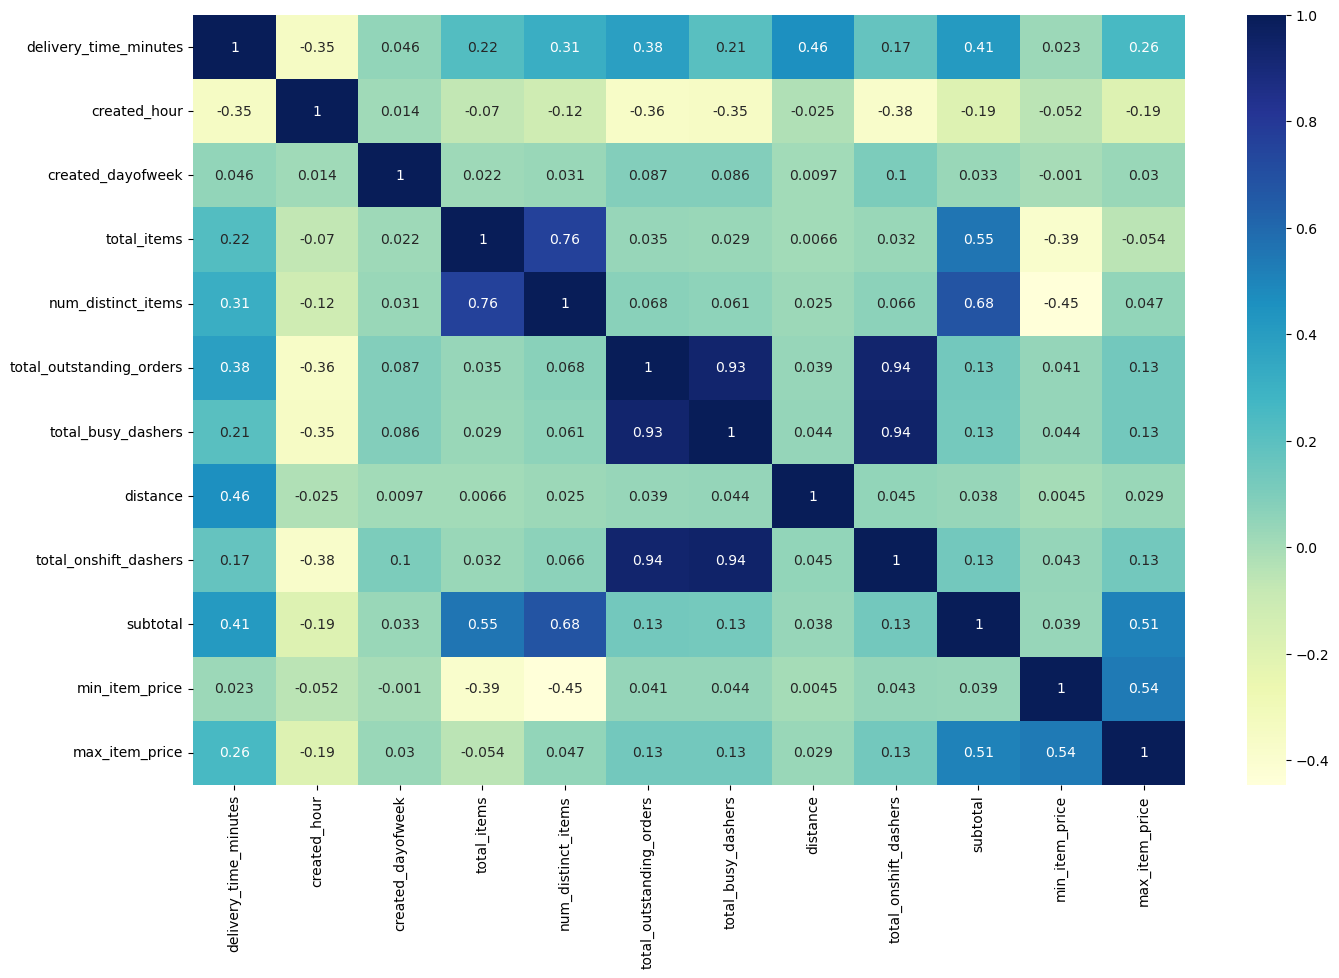

In [269]:
# Plot the heatmap of the correlation matrix
numerical_col = ['delivery_time_minutes','created_hour','created_dayofweek','total_items','num_distinct_items','total_outstanding_orders','total_busy_dashers','distance','total_onshift_dashers','subtotal','min_item_price','max_item_price']
plt.figure(figsize = (16, 10))
sns.heatmap(df[numerical_col].corr(), annot = True, cmap="YlGnBu")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [771]:
# Drop 3-5 weakly correlated columns from training dataset
df.drop(['created_dayofweek','min_item_price'], axis = 1, inplace = True)
df.drop(['total_onshift_dashers'], axis = 1, inplace = True)

In [773]:
df_encoded.drop(['created_dayofweek','min_item_price'], axis = 1, inplace = True)
df_encoded.drop(['total_onshift_dashers'], axis = 1, inplace = True)

In [775]:
df_train.drop(['created_dayofweek','min_item_price'], axis = 1, inplace = True)
df_train.drop(['total_onshift_dashers'], axis = 1, inplace = True)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

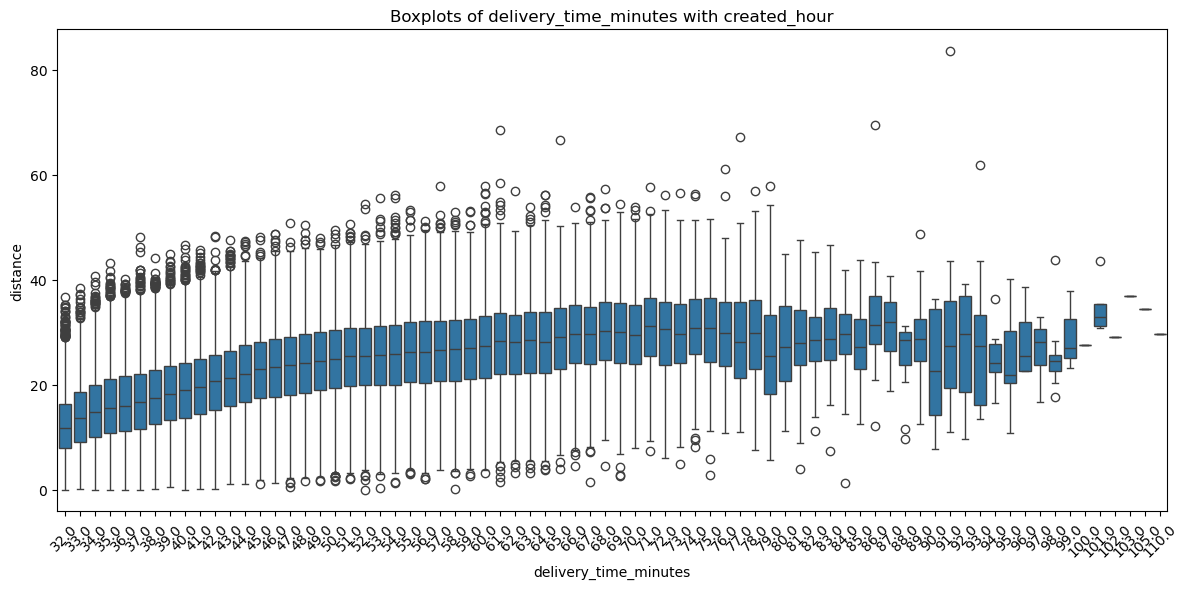

In [191]:
# Boxplot for time_taken

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='total_items', y='delivery_time_minutes')
plt.xticks(rotation=45)
plt.title('Boxplots of delivery_time_minutes with created_hour')
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [777]:
# Import libraries

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [781]:
# Apply scaling to the numerical columns
numerical_col = ['delivery_time_minutes','created_hour','total_items','num_distinct_items','total_outstanding_orders','total_busy_dashers','distance','subtotal','max_item_price']
scaler = MinMaxScaler()
df_train[numerical_col] = scaler.fit_transform(df_train[numerical_col])

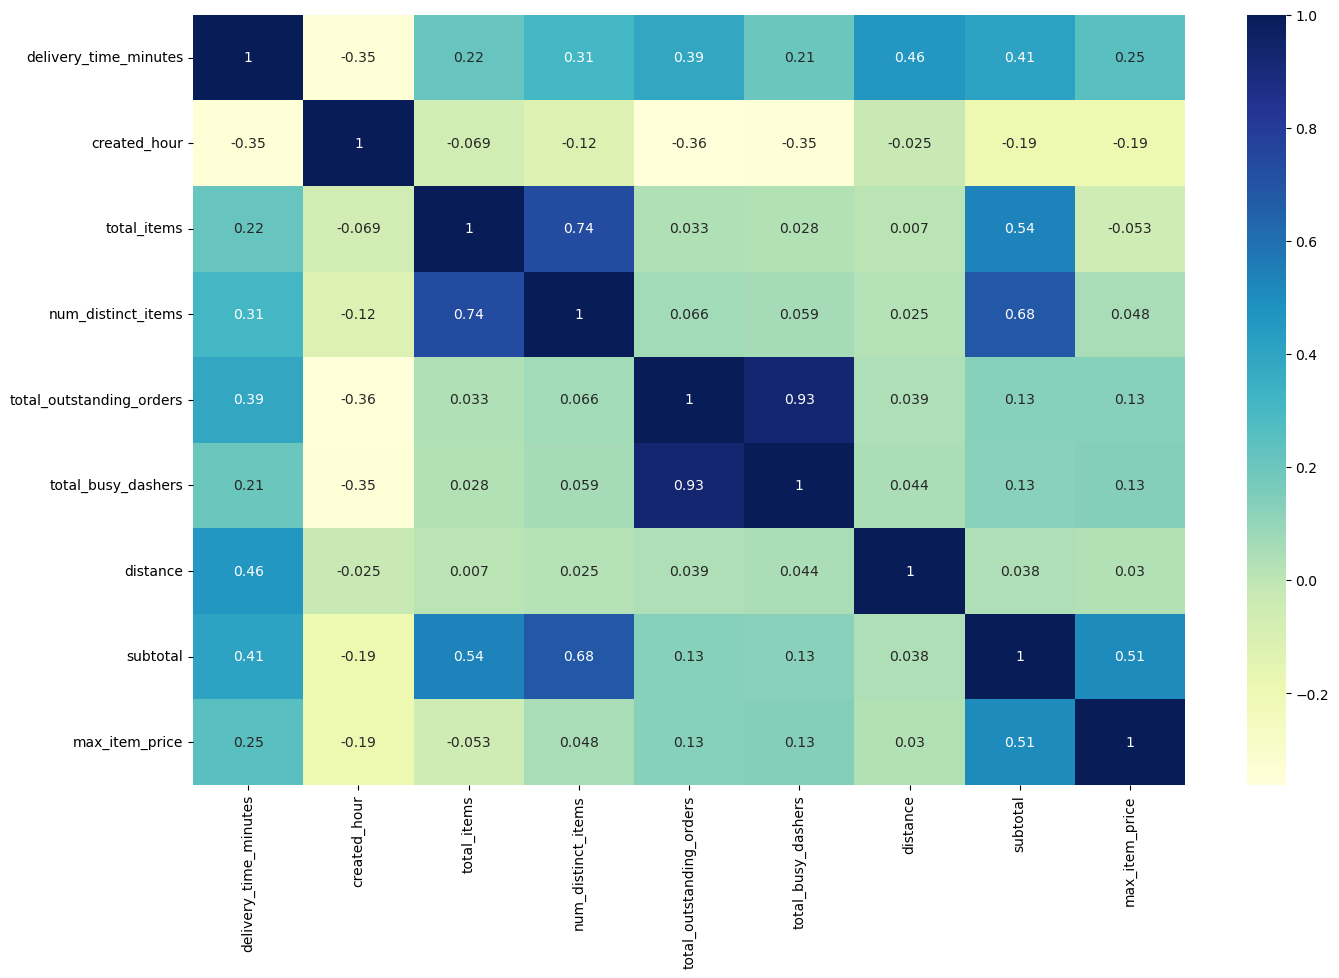

In [691]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train[numerical_col].corr(), annot = True, cmap="YlGnBu")
plt.show()

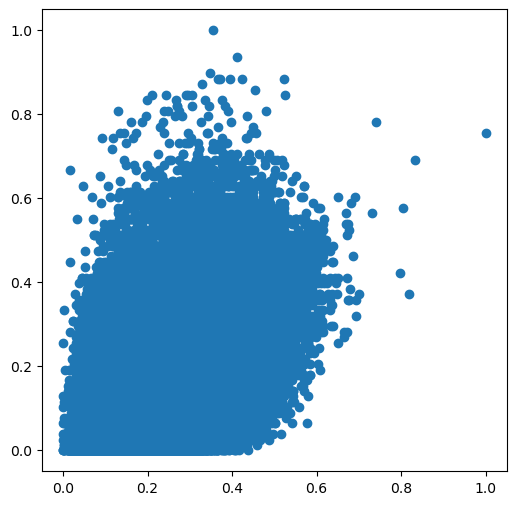

In [609]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.distance, df_train.delivery_time_minutes)
plt.show()

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [783]:
# Create/Initialise the model
y_train = df_train.pop('delivery_time_minutes')
X_train = df_train

In [785]:
#Building Model adding most correlated independent variable

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train['distance'])

lr_Model1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_Model1.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.212
Model:                               OLS   Adj. R-squared:                  0.212
Method:                    Least Squares   F-statistic:                 3.303e+04
Date:                   Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                           00:00:08   Log-Likelihood:             1.0146e+05
No. Observations:                 123043   AIC:                        -2.029e+05
Df Residuals:                     123041   BIC:                        -2.029e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0447 

In [787]:
#adding new variable which is most correlated
X_train_set2 = X_train[['distance', 'subtotal']]

In [789]:
#traning Model iteration 2
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_set2)

lr_Model2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_Model2.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.368
Model:                               OLS   Adj. R-squared:                  0.368
Method:                    Least Squares   F-statistic:                 3.583e+04
Date:                   Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                           00:00:15   Log-Likelihood:             1.1506e+05
No. Observations:                 123043   AIC:                        -2.301e+05
Df Residuals:                     123040   BIC:                        -2.301e+05
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204 

In [793]:
#adding next set of dependent variables
X_train_set3 = X_train[['distance', 'subtotal','total_outstanding_orders','created_hour','num_distinct_items','total_items','max_item_price','total_busy_dashers']]

In [795]:
#training Model iteration 3
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_set3)

lr_Model3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_Model3.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.698
Model:                               OLS   Adj. R-squared:                  0.698
Method:                    Least Squares   F-statistic:                 3.560e+04
Date:                   Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                           00:01:16   Log-Likelihood:             1.6056e+05
No. Observations:                 123043   AIC:                        -3.211e+05
Df Residuals:                     123034   BIC:                        -3.210e+05
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [797]:
#added independent variables based on their low p value and high coef
X_train_set4 = X_train[['distance', 'subtotal','total_outstanding_orders','created_hour','num_distinct_items','total_items','max_item_price','total_busy_dashers','order_protocol_2.0','order_protocol_3.0','order_protocol_4.0','order_protocol_5.0','order_protocol_6.0','market_id_2.0','market_id_3.0','market_id_4.0','market_id_5.0','market_id_6.0']]

In [799]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_set4)

lr_Model4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_Model4.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.767
Model:                               OLS   Adj. R-squared:                  0.767
Method:                    Least Squares   F-statistic:                 2.244e+04
Date:                   Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                           00:12:37   Log-Likelihood:             1.7633e+05
No. Observations:                 123043   AIC:                        -3.526e+05
Df Residuals:                     123024   BIC:                        -3.524e+05
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [802]:
X_train_set5 = X_train[['distance', 'subtotal','total_outstanding_orders','created_hour','num_distinct_items','total_items','max_item_price','total_busy_dashers','order_protocol_2.0','order_protocol_3.0','order_protocol_4.0','order_protocol_5.0','order_protocol_6.0','market_id_2.0','market_id_3.0','market_id_4.0','market_id_5.0','market_id_6.0','store_primary_category_2','store_primary_category_4','store_primary_category_6','store_primary_category_7','store_primary_category_10','store_primary_category_12']]

In [804]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_set5)

lr_Model5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_Model5.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.767
Model:                               OLS   Adj. R-squared:                  0.767
Method:                    Least Squares   F-statistic:                 1.684e+04
Date:                   Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                           00:31:32   Log-Likelihood:             1.7636e+05
No. Observations:                 123043   AIC:                        -3.527e+05
Df Residuals:                     123018   BIC:                        -3.524e+05
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [810]:
#adding independent variables with low p and high coef values
X_train_set6 = X_train[['distance', 'subtotal','total_outstanding_orders','created_hour','num_distinct_items','total_items','max_item_price','total_busy_dashers','order_protocol_2.0','order_protocol_3.0','order_protocol_4.0','order_protocol_5.0','order_protocol_6.0','market_id_2.0','market_id_3.0','market_id_4.0','market_id_5.0','market_id_6.0','store_primary_category_2','store_primary_category_4','store_primary_category_6','store_primary_category_7','store_primary_category_10','store_primary_category_12','isWeekend']]

In [812]:
#final and pretty much stable Model 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_set6)

lr_Model6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_Model6.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.773
Model:                               OLS   Adj. R-squared:                  0.773
Method:                    Least Squares   F-statistic:                 1.672e+04
Date:                   Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                           00:35:39   Log-Likelihood:             1.7796e+05
No. Observations:                 123043   AIC:                        -3.559e+05
Df Residuals:                     123017   BIC:                        -3.556e+05
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [846]:
# Make predictions

#step 1 : doing scalar transform first on test dataset

#numerical_col = ['delivery_time_minutes','created_hour','total_items','num_distinct_items','total_outstanding_orders','total_busy_dashers','distance','subtotal','max_item_price']
numerical_cols = ['delivery_time_minutes','distance', 'subtotal','total_outstanding_orders','created_hour','num_distinct_items','total_items','max_item_price','total_busy_dashers','order_protocol_2.0','order_protocol_3.0','order_protocol_4.0','order_protocol_5.0','order_protocol_6.0','market_id_2.0','market_id_3.0','market_id_4.0','market_id_5.0','market_id_6.0','store_primary_category_2','store_primary_category_4','store_primary_category_6','store_primary_category_7','store_primary_category_10','store_primary_category_12','isWeekend']
scaler = MinMaxScaler()
df_test[numerical_col] = scaler.fit_transform(df_test[numerical_col])

In [848]:
#step 2: define x and y

X_test = df_test[numerical_col]
y_test = df_test.pop('delivery_time_minutes')


In [850]:
# train model

import statsmodels.api as sm
X_test_lm = sm.add_constant(X_test)

lr_predict_Model = sm.OLS(y_test, X_test_lm).fit()

lr_predict_Model.params

const                       1.001369e-15
delivery_time_minutes       1.000000e+00
created_hour               -2.040468e-16
total_items                -7.979728e-17
num_distinct_items          4.857226e-17
total_outstanding_orders   -5.377643e-17
total_busy_dashers         -2.185752e-16
distance                   -4.093947e-16
subtotal                   -4.675080e-16
max_item_price             -6.938894e-17
dtype: float64

In [729]:
print(lr_predict_Model.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.904
Model:                               OLS   Adj. R-squared:                  0.904
Method:                    Least Squares   F-statistic:                     5274.
Date:                   Tue, 20 May 2025   Prob (F-statistic):               0.00
Time:                           23:35:59   Log-Likelihood:                 93896.
No. Observations:                  52734   AIC:                        -1.876e+05
Df Residuals:                      52639   BIC:                        -1.868e+05
Df Model:                             94                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
# Find results for evaluation metrics



Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [882]:
# Loop through the number of features and test the model
selected_cols = ['delivery_time_minutes','distance','subtotal', 'total_outstanding_orders', 'created_hour', 'num_distinct_items', 'total_items', 'max_item_price', 'total_busy_dashers', 'order_protocol_2.0', 'order_protocol_3.0', 
'order_protocol_4.0', 'order_protocol_5.0', 'order_protocol_6.0', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0', 'store_primary_category_2', 
'store_primary_category_4', 'store_primary_category_6', 'store_primary_category_7', 'store_primary_category_10', 'store_primary_category_12', 'isWeekend',]


In [884]:
df_train_selected = df_train[selected_cols].copy()

In [886]:
X_train = df_train_selected
y_train = df_train_selected.pop('delivery_time_minutes')


In [892]:
#Now build model again
import statsmodels.api as sm
X_train_lm = sm.add_constant(df_train_selected)

lr_Model_RFE1 = sm.OLS(y_train, X_train_lm).fit()

lr_Model_RFE1.params

const                        35.973303
distance                      0.483594
subtotal                      0.001192
total_outstanding_orders      0.246563
created_hour                 -0.164070
num_distinct_items            0.523356
total_items                  -0.026373
max_item_price                0.000630
total_busy_dashers           -0.320093
order_protocol_2.0           -0.697445
order_protocol_3.0           -1.520372
order_protocol_4.0           -1.957846
order_protocol_5.0           -2.935501
order_protocol_6.0           -1.701516
market_id_2.0                -6.475045
market_id_3.0                -4.638999
market_id_4.0                -4.901100
market_id_5.0                -4.524355
market_id_6.0                -3.731760
store_primary_category_2     -0.425917
store_primary_category_4     -0.240717
store_primary_category_6     -0.664505
store_primary_category_7     -0.071212
store_primary_category_10    -0.107250
store_primary_category_12    -0.147221
isWeekend                

In [894]:
print(lr_Model_RFE1.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.773
Model:                               OLS   Adj. R-squared:                  0.773
Method:                    Least Squares   F-statistic:                 1.672e+04
Date:                   Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                           23:01:17   Log-Likelihood:            -3.5810e+05
No. Observations:                 123043   AIC:                         7.163e+05
Df Residuals:                     123017   BIC:                         7.165e+05
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [900]:
df_train_selected = df_train_selected.drop(['store_primary_category_2', 
'store_primary_category_4', 'store_primary_category_6', 'store_primary_category_7', 'store_primary_category_10', 'store_primary_category_12','order_protocol_2.0', 'order_protocol_3.0', 
'order_protocol_4.0', 'order_protocol_5.0', 'order_protocol_6.0', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0'],axis=1)

In [902]:
#Now build model again
import statsmodels.api as sm
X_train_lm = sm.add_constant(df_train_selected)

lr_Model_RFE2 = sm.OLS(y_train, X_train_lm).fit()

lr_Model_RFE2.params

const                       32.136010
distance                     0.469633
subtotal                     0.001250
total_outstanding_orders     0.245845
created_hour                -0.210982
num_distinct_items           0.540431
total_items                 -0.040261
max_item_price               0.000807
total_busy_dashers          -0.357070
isWeekend                    1.744953
dtype: float64

In [904]:
print(lr_Model_RFE2.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.706
Model:                               OLS   Adj. R-squared:                  0.706
Method:                    Least Squares   F-statistic:                 3.285e+04
Date:                   Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                           23:04:52   Log-Likelihood:            -3.7390e+05
No. Observations:                 123043   AIC:                         7.478e+05
Df Residuals:                     123033   BIC:                         7.479e+05
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [908]:
vif = pd.DataFrame()
vif['Features'] = df_train_selected.columns
vif['VIF'] = [variance_inflation_factor(df_train_selected.values, i) for i in range(df_train_selected.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7        total_busy_dashers  20.13
2  total_outstanding_orders  17.21
4        num_distinct_items  10.60
1                  subtotal  10.04
6            max_item_price   7.18
5               total_items   5.39
0                  distance   5.17
3              created_hour   1.90
8                 isWeekend   1.55

In [906]:
# Build the final model with selected number of features
df_train_selected.info()


<class 'pandas.core.frame.DataFrame'>
Index: 123043 entries, 94465 to 121958
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   distance                  123043 non-null  float64
 1   subtotal                  123043 non-null  int64  
 2   total_outstanding_orders  123043 non-null  float64
 3   created_hour              123043 non-null  int32  
 4   num_distinct_items        123043 non-null  int64  
 5   total_items               123043 non-null  int64  
 6   max_item_price            123043 non-null  int64  
 7   total_busy_dashers        123043 non-null  float64
 8   isWeekend                 123043 non-null  int32  
dtypes: float64(3), int32(2), int64(4)
memory usage: 8.4 MB


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>